In [4]:
import pandas as pd
data = pd.read_csv('processed_train_data.csv')
data

,gitId,MSSubClass,MSZoning_0,MSZoning_1,MSZoning_2,LotFrontage,LotArea,Street,Alley,LotShape,...,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,SalePrice
0,1,60,0,0,1,65.0,8450,1,0,0,...,False,False,False,False,True,False,False,False,True,208500
1,2,20,0,0,1,80.0,9600,1,0,0,...,False,False,True,False,False,False,False,False,True,181500
2,3,60,0,0,1,68.0,11250,1,0,1,...,False,False,False,False,True,False,False,False,True,223500
3,4,70,0,0,1,60.0,9550,1,0,1,...,False,False,False,False,False,False,False,False,True,140000
4,5,60,0,0,1,84.0,14260,1,0,1,...,False,False,True,False,False,False,False,False,True,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1456,60,0,0,1,62.0,7917,1,0,0,...,False,False,False,False,True,False,False,False,True,175000
1455,1457,20,0,0,1,85.0,13175,1,0,0,...,False,False,False,False,True,False,False,False,True,210000
1456,1458,70,0,0,1,66.0,9042,1,0,0,...,False,False,False,False,True,False,False,False,True,266500
1457,1459,20,0,0,1,68.0,9717,1,0,0,...,False,False,False,False,True,False,False,False,False,142125


In [30]:
ID, X, Y = data.iloc[:, 0], data.iloc[1:-1, :], data.iloc[:,-1]
ID

0          1
1          2
2          3
3          4
4          5
        ... 
1454    1456
1455    1457
1456    1458
1457    1459
1458    1460
Name: gitId, Length: 1459, dtype: int64

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

corr = data.corr()

# plt.figure(figsize=(20, 15))
# sns.heatmap(corr, cmap='coolwarm', annot=False, fmt=".2f")
# plt.show()
cols = corr.columns
val = corr.values
for i in range(len(cols)):
    for j in range(i + 1, len(cols)):
        if abs(val[i, j]) >= 0.5:
            focus = "*" * (int(abs(val[i, j]) * 10) - 5)
            print(f"{focus} -- {cols[i]} -- {cols[j]} -- {val[i, j]}")

* -- MSSubClass -- BldgType_0 -- 0.6813566585009788
* -- MSSubClass -- BldgType_2 -- -0.685302528681772
*** -- MSZoning_1 -- MSZoning_2 -- -0.8295636838987892
 -- LandSlope -- LandContour_Low -- 0.539898934975951
 -- LandSlope -- LandContour_Lvl -- -0.5220220409992847
 -- Condition1_2 -- Condition1_3 -- -0.5925052349688689
* -- Condition2_1 -- Condition2_3 -- -0.6979296066252587
** -- BldgType_0 -- BldgType_2 -- -0.7274438436135442
** -- BldgType_1 -- KitchenAbvGr -- 0.7672642472723252
 -- HouseStyle -- 2ndFlrSF -- 0.5598530334130434
 -- OverallQual -- YearBuilt -- 0.5733339631760762
 -- OverallQual -- YearRemodAdd -- 0.5516053856834794
** -- OverallQual -- ExterQual -- -0.7261783531341062
 -- OverallQual -- Foundation_1 -- -0.5256850659131881
* -- OverallQual -- BsmtQual -- -0.6299068432976881
 -- OverallQual -- TotalBsmtSF -- 0.5375225406670561
 -- OverallQual -- GrLivArea -- 0.5930207837339594
 -- OverallQual -- FullBath -- 0.551267390741308
* -- OverallQual -- KitchenQual -- -0.674

79.87


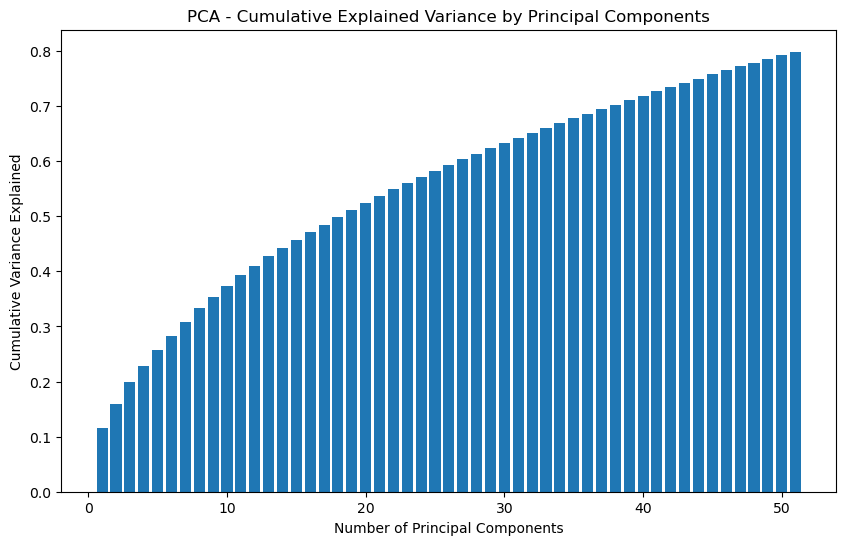

In [26]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

pca = PCA(n_components=51)
pca_result = pca.fit_transform(data_scaled)

explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()
print(f"{sum(explained_variance)*100:.2f}")

plt.figure(figsize=(10, 6))
plt.bar(range(1, len(cumulative_variance) + 1), cumulative_variance)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.title('PCA - Cumulative Explained Variance by Principal Components')
plt.show()


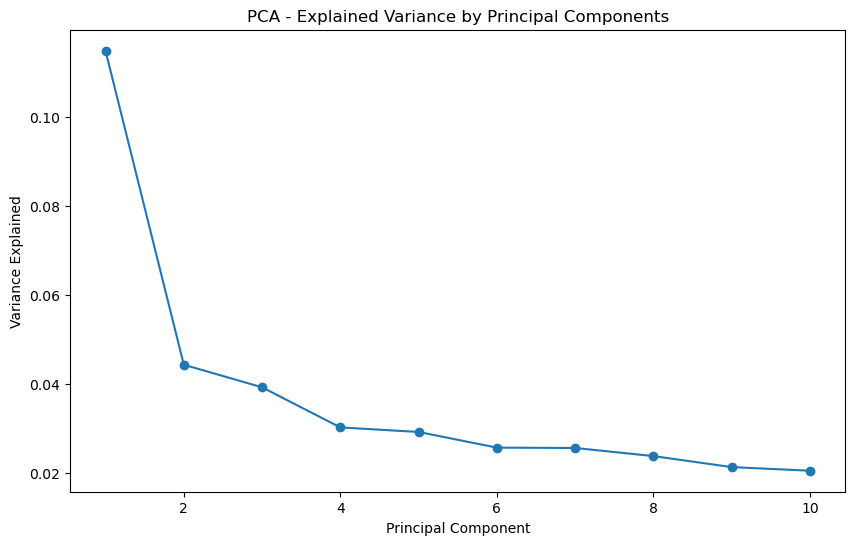

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.title('PCA - Explained Variance by Principal Components')
plt.show()